# Concentration - Light intensity calibration

This notebook will further verify the relation between local concentration and local pixel intensity by showing that the time average of local pixel intensity in a long enough period agrees with the spatial average in one frame.

## 0 Packages

In [2]:
from skimage import io
import os
import pandas as pd
import numpy as np
from corrLib import readseq
import matplotlib.pyplot as plt
from corr_utils import *
import typesetting.main as tm
from log import experiment_log
import matplotlib

In [13]:
color_dict, marker_list = unified_symbols() # keep color and symbol consistent across different plot, for same concentrations
data_master_dir = 'G:\\' # data folder: Google drive for now, but may change in the future
tm.prl('1-column-2-panel') # control the default plotting configurations, now I realize the parameters should vary from plot to plot
# dirs = data_log_mapping(kw='aug') # video info for GNF raw data, obtained from Aug 3rd to Aug 6th
log_df = experiment_log()
n0_to_vf = 0.08
matplotlib.rcParams['text.usetex'] = True
vb = 1 # um^3

-------The log looks OK!--------


## 1 Single video test

In [4]:
data_master_dir = r'E:\BaiduNetdiskDownload\12212020'

l = readseq(os.path.join(data_master_dir, r'10\8-bit'))

# down to one pixel
intensity_list = []
for num, i in l.iterrows():
    img = io.imread(i.Dir)
    intensity = img[100:900:100, 100:900:100]
    intensity_list.append(intensity)

li = np.stack(intensity_list,axis=0)

KeyboardInterrupt: 

In [ ]:
li.mean()

In [42]:
img = io.imread(r'E:\BaiduNetdiskDownload\12212020\10\8-bit\0700.tif')
img.mean()

67.47925911480904

## 2 Batch process

In [5]:
data_master_dir = r'E:\BaiduNetdiskDownload\12212020'
temp_mean_list = []
temp_std_list = []
spatial_mean_list = []
spatial_std_list = []
for n in range(0, 11):
    l = readseq(os.path.join(data_master_dir, r'{:02d}\8-bit'.format(n)))
    intensity_list = []
    for num, i in l.iterrows():
        img = io.imread(i.Dir)
        intensity = img[100:900:100, 100:900:100]
        intensity_list.append(intensity)
    li = np.stack(intensity_list,axis=0)
    temp_mean = li.mean()
    temp_mean_list.append(temp_mean)
    temp_std = li.std()
    temp_std_list.append(temp_std)
    img = io.imread(r'E:\BaiduNetdiskDownload\12212020\{:02d}\8-bit\0700.tif'.format(n))
    spatial_mean = img.mean()
    spatial_mean_list.append(spatial_mean)
    spatial_std = img.std()
    spatial_std_list.append(spatial_std)

In [11]:
data = pd.DataFrame().assign(c=[10, 10, 20, 20, 30, 30, 50, 50, 80, 80, 110], temp=temp_mean_list,
                             temp_std=temp_std_list, spatial=spatial_mean_list, spatial_std=spatial_std_list)

In [14]:
data.to_csv(os.path.join(data_master_dir, r'Research projects\DF\data\intensity-concentration-calibration\spatial-temporal.csv'), index=False)

Text(0, 0.5, '$I$ ($a.u.$)')

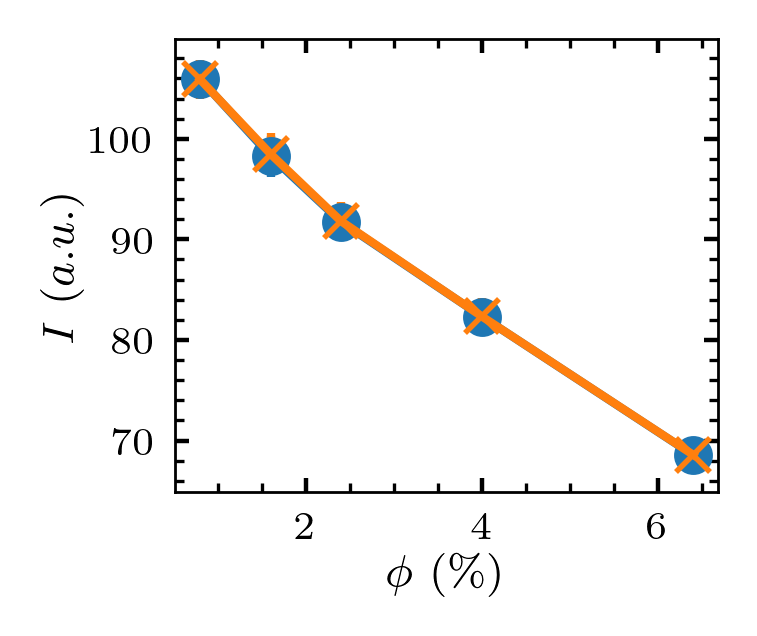

In [15]:
fig, ax = plt.subplots()
conc = np.array([10, 20, 30, 50, 80]) * n0_to_vf
ax.errorbar(conc, np.array(temp_mean_list)[0:10:2], yerr=np.array(temp_std_list)[0:10:2], marker='o')
ax.errorbar(conc, np.array(spatial_mean_list)[0:10:2], yerr=np.array(spatial_std_list)[0:10:2], marker = 'x')
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$I$ ($a.u.$)')

Text(0, 0.5, '$I$ ($a.u.$)')

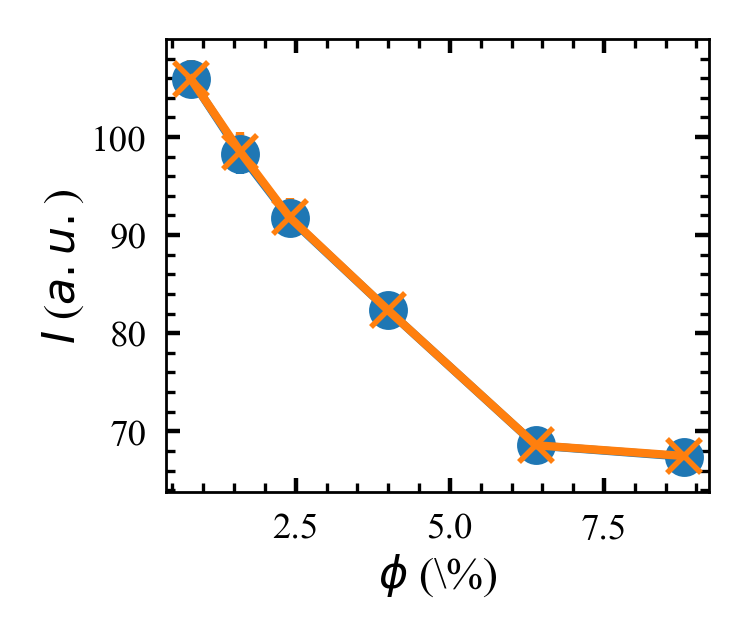

In [8]:
fig, ax = plt.subplots()
conc = np.array([10, 20, 30, 50, 80, 110]) * n0_to_vf
ax.errorbar(conc, np.array(temp_mean_list)[0:12:2], yerr=np.array(temp_std_list)[0:12:2], marker='o')
ax.errorbar(conc, np.array(spatial_mean_list)[0:12:2], yerr=np.array(spatial_std_list)[0:12:2], marker = 'x')
ax.set_xlabel('$\phi$ (\%)')
ax.set_ylabel('$I$ ($a.u.$)')